In [15]:
import os,sys
import pandas as pd
import numpy as np

from multiprocessing import Pool
from functools import partial

import h5py as h5
sensor_data = '/users/staff/federico/GitHub/CEUAS_master_SEPTEMBER2021/CEUAS/CEUAS/public/merge/utilities/sensor_tables/ALL'
merged = '/scratch/das/federico/MERGED_25FEB2022'


files = [f for f in  os.listdir(sensor_data) if 'all' not in f ]


sensor_configuration = 'sensor_configuration_all.csv'



In [12]:
c = pd.read_csv(files[0], sep = '\t')
c['date_time_conv'] = pd.to_datetime( c['date_time_conv'][:] )

In [11]:
c

,Unnamed: 0,date_time,sensor_id,date_time_conv,t
0,0,2275905600,b'NA ',1972-02-14 12:00:00,1972-02-14 12:00:00
1,15955,2967494400,b'31.',1994-01-14 00:00:00,1994-01-14 00:00:00
2,15956,3726256510,b'80.',2018-01-29 23:15:10,2018-01-29 23:15:10
3,16287,3743262960,b'17.',2018-08-14 19:16:00,2018-08-14 19:16:00
4,18303,3830803200,b'nan',2021-05-24 00:00:00,2021-05-24 00:00:00


In [133]:
def analyze_df(file):
    """ Extracts basic info from the sensor dataframe """
    
    sensor_data = '/users/staff/federico/GitHub/CEUAS_master_SEPTEMBER2021/CEUAS/CEUAS/public/merge/utilities/sensor_tables/ALL'
    merged = '/scratch/das/federico/MERGED_25FEB2022'

    
    s_file = sensor_data + '/' + file 
    
    df = pd.read_csv(s_file, sep = '\t')
    df['date_time_conv'] = pd.to_datetime( df['date_time_conv'][:] )
    
    ts = pd.Timestamp('2012-12-31')
    
    
    bef = df.loc[df['date_time_conv'] <= ts ]
    aft = df.loc[df['date_time_conv'] > ts ]


    
    m_file = merged + '/' + file.replace('_sensor.csv' , '_CEUAS_merged_v1.nc')
    
    sc = h5.File(m_file, 'r')['station_configuration']
    
    if len(bef) >0:
        s_bef = bef.sensor_id.values[-1]
        d_bef = bef.date_time_conv.values[-1] 
    else:
        s_bef =  'NA'
        d_bef =  pd.Timestamp('2050-12-31')
        

    if len(aft) >0:
        s_aft = aft.sensor_id.values[0]
        d_aft = aft.date_time_conv.values[0] 
    else:
        s_aft = 'NA'
        d_aft = pd.Timestamp('1900-12-31')
        
    try:
        r = { 's_bef': s_bef, 'd_bef': d_bef,
              's_aft': s_aft , 'd_aft': d_aft,
              'station_name': (b''.join(sc['station_name'][:])).decode('utf-8'),
              'lat': sc['latitude'][:][0],
              'lon': sc['longitude'][:][0],
              'primary_id': (b''.join(sc['primary_id'][:])).decode('utf-8'),
        }
        return r 
    except:
        
        print(file)
        r = { 's_bef': s_bef, 'd_bef': d_bef,
          's_aft': s_aft , 'd_aft': d_aft,
          'station_name': '',
          'lat': '',
          'lon': '',
          'primary_id': '',
        }
        return None 

    #print(m_file)





In [141]:
a = analyze_df(files[0])
#type(a['s_bef'])
#a['s_bef']
a['s_bef'].decode('utf-8')

AttributeError: 'str' object has no attribute 'decode'

In [111]:
# Running in multiproc

p    = Pool(30)
func = partial(analyze_df)
res  = p.map(func, files)

res = [f for f in res if f ]


0-20400-0-6124_sensor.csv


In [125]:
lats, lons, names, pids = [ r['lat'] for r in res] ,  [ r['lon'] for r in res] ,  [ r['station_name'] for r in res] , [ r['primary_id'] for r in res]
id_before, id_after = [ r['s_bef'] for r in res] ,  [ r['s_aft'] for r in res]
d_bef, d_aft = [ r['d_bef'] for r in res] , [ r['d_aft'] for r in res] 


In [152]:
d_aft[:50]


[numpy.datetime64('2018-01-29T23:15:10.000000000'),
 numpy.datetime64('2019-08-23T11:15:00.000000000'),
 Timestamp('1900-12-31 00:00:00'),
 Timestamp('1900-12-31 00:00:00'),
 numpy.datetime64('2012-12-31T12:00:00.000000000'),
 numpy.datetime64('2017-11-07T13:42:35.000000000'),
 Timestamp('1900-12-31 00:00:00'),
 Timestamp('1900-12-31 00:00:00'),
 Timestamp('1900-12-31 00:00:00'),
 numpy.datetime64('2015-10-14T00:00:00.000000000'),
 Timestamp('1900-12-31 00:00:00'),
 Timestamp('1900-12-31 00:00:00'),
 numpy.datetime64('2013-12-09T00:00:00.000000000'),
 numpy.datetime64('2012-12-31T12:00:00.000000000'),
 Timestamp('1900-12-31 00:00:00'),
 numpy.datetime64('2013-01-22T00:00:00.000000000'),
 numpy.datetime64('2013-07-23T11:40:00.000000000'),
 numpy.datetime64('2012-12-31T12:00:00.000000000'),
 Timestamp('1900-12-31 00:00:00'),
 numpy.datetime64('2012-12-31T12:00:00.000000000'),
 numpy.datetime64('2012-12-31T18:00:00.000000000'),
 numpy.datetime64('2012-12-31T12:00:00.000000000'),
 Timestam

In [153]:
d_bef[:50]

[numpy.datetime64('1994-01-14T00:00:00.000000000'),
 numpy.datetime64('1989-02-26T12:00:00.000000000'),
 numpy.datetime64('1957-09-19T00:00:00.000000000'),
 numpy.datetime64('1961-06-30T00:00:00.000000000'),
 numpy.datetime64('1990-07-20T12:00:00.000000000'),
 Timestamp('2050-12-31 00:00:00'),
 numpy.datetime64('1942-02-28T03:00:00.000000000'),
 numpy.datetime64('1942-02-28T04:00:00.000000000'),
 numpy.datetime64('2001-04-01T06:00:00.000000000'),
 Timestamp('2050-12-31 00:00:00'),
 numpy.datetime64('1942-02-28T03:00:00.000000000'),
 numpy.datetime64('1980-12-13T00:00:00.000000000'),
 numpy.datetime64('2012-12-31T00:00:00.000000000'),
 numpy.datetime64('2005-12-22T00:00:00.000000000'),
 numpy.datetime64('1977-10-02T12:00:00.000000000'),
 numpy.datetime64('2012-11-28T00:00:00.000000000'),
 Timestamp('2050-12-31 00:00:00'),
 numpy.datetime64('1995-09-12T11:00:00.000000000'),
 numpy.datetime64('1931-12-18T10:00:00.000000000'),
 numpy.datetime64('1999-12-02T00:00:00.000000000'),
 numpy.date

In [154]:
data = pd.DataFrame( {'lat': lats, 'lon':lons, 'station_name':names, 'sensor_before': id_before , 'sensor_after': id_after , 'primary_id': pids,
                     'd_bef': pd.to_datetime(d_bef) , 'd_aft': pd.to_datetime(d_aft) }  )


In [155]:
data = pd.DataFrame( {'lat': lats, 'lon':lons, 'station_name':names, 'sensor_before': id_before , 'sensor_after': id_after , 'primary_id': pids,
                     'd_bef': d_bef , 'd_aft': d_aft }  )

In [156]:
data_before = data.loc[data['d_bef'] > np.datetime64('1990-01-01')]

data_after = data.loc[data['d_aft'] > np.datetime64('2012-12-30')]


In [157]:
data_after

,lat,lon,station_name,sensor_before,sensor_after,primary_id,d_bef,d_aft
0,50.261944,-119.271667,"Vernon UA, BC",b'31.',b'80.',0-124-0-73033,1994-01-14 00:00:00,2018-01-29 23:15:10
1,44.631943,-63.505280,"Shearwater UA, NS",b'nan',b'17.',0-124-0-73110,1989-02-26 12:00:00,2019-08-23 11:15:00
4,67.266945,14.358611,BODO VI,b'VC_ ',b'81.0',0-20000-0-01152,1990-07-20 12:00:00,2012-12-31 12:00:00
5,62.329166,5.267778,SVINOY LH,NA,b'NA ',0-20000-0-01205,2050-12-31 00:00:00,2017-11-07 13:42:35
9,59.349724,5.197778,HAUGESUND AP,NA,b'nan',0-20000-0-01408,2050-12-31 00:00:00,2015-10-14 00:00:00
...,...,...,...,...,...,...,...,...
2285,-19.633612,146.857773,Woodstock,NA,b'NA ',0-36-9-95282,2050-12-31 00:00:00,2019-12-11 23:00:00
2287,13.066667,-59.483334,GRANTLEY ADAMS,b'CF ',b'51.0',0-52-130-78954,1999-01-25 12:00:00,2012-12-31 12:00:00
2289,39.091110,-28.029167,GRACIOSA/AERODROMO,b'80.0',b'nan',0-620-2001-08507,2011-01-05 17:00:00,2016-05-26 12:00:00
2290,38.774166,-9.134167,LISBOA/PORTELA,b'nan',b'124.',0-620-2001-08536,1984-02-28 00:00:00,2019-12-20 11:16:18


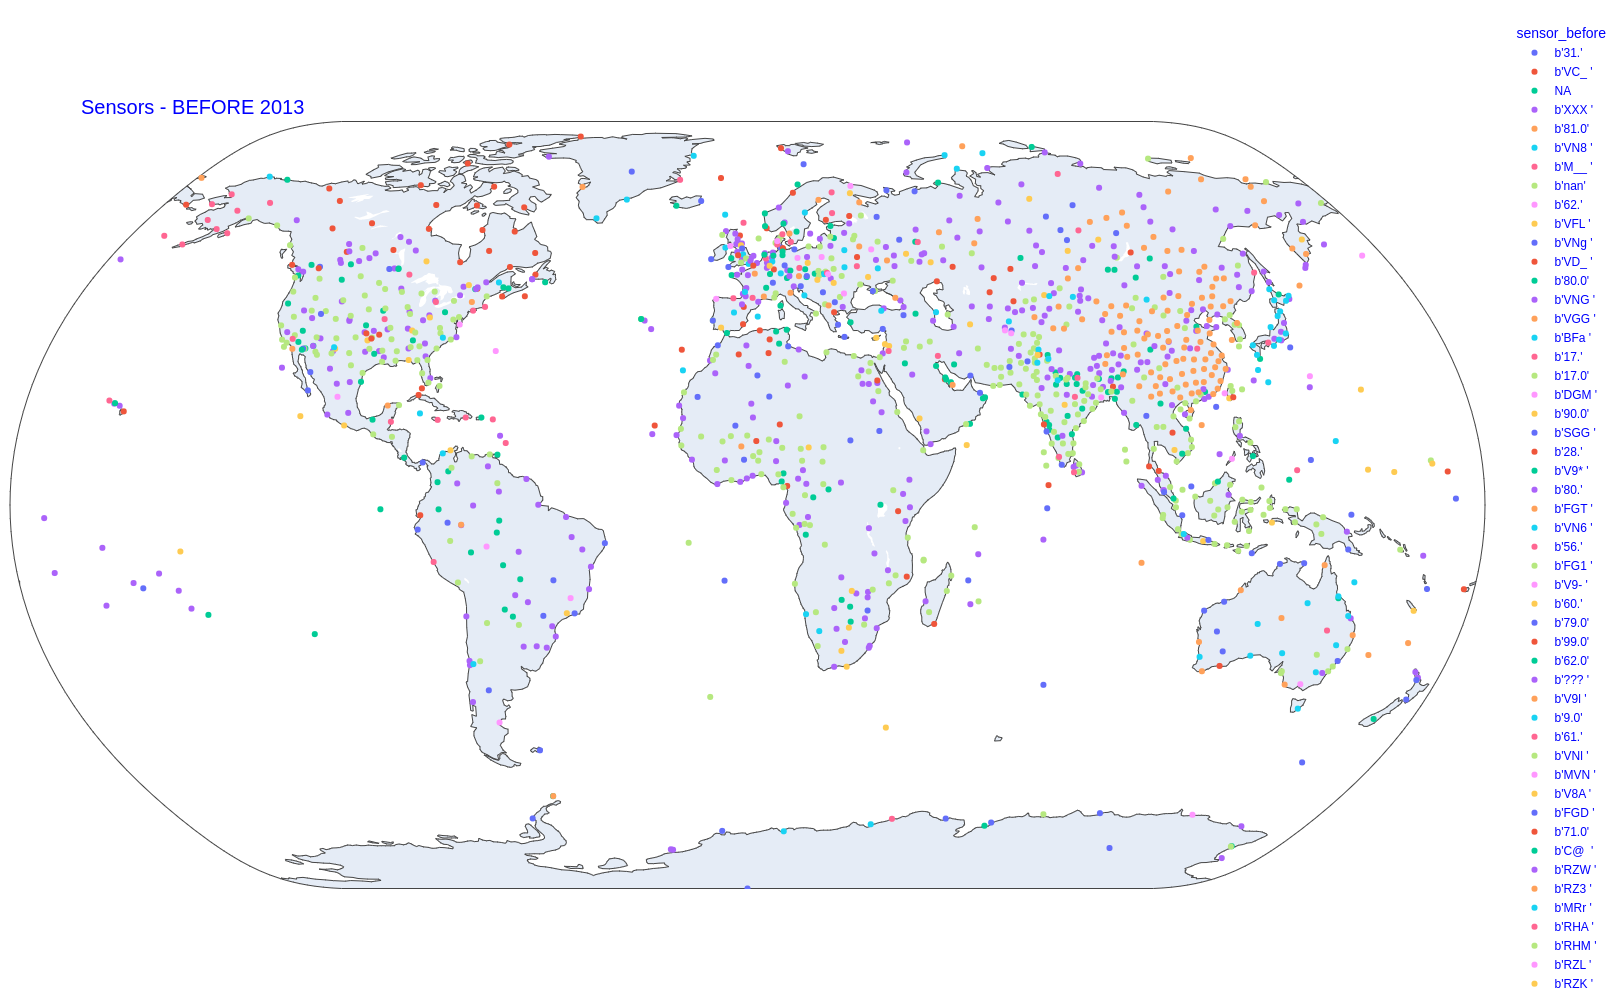

In [158]:
import plotly.express as px


fig = px.scatter_geo(data_before, 
                     lat = "lat",
                     lon = "lon",
                     color="sensor_before", # which column to use to set the color of markers
                     hover_name="primary_id", # column added to hover information
                     projection="natural earth")

fig.update_layout(
    margin=dict(l=10, r=10, t=20, b=10),
    #paper_bgcolor="pink",
)

# fig size
fig.update_layout(width= 1500, height = 1000)

# title
fig.update_layout(title_text='Sensors - BEFORE 2013 ',
                  title_y=0.9,
                  title_font_size=20,
)
fig.update_layout(
    font_color="blue",
)

fig.show()



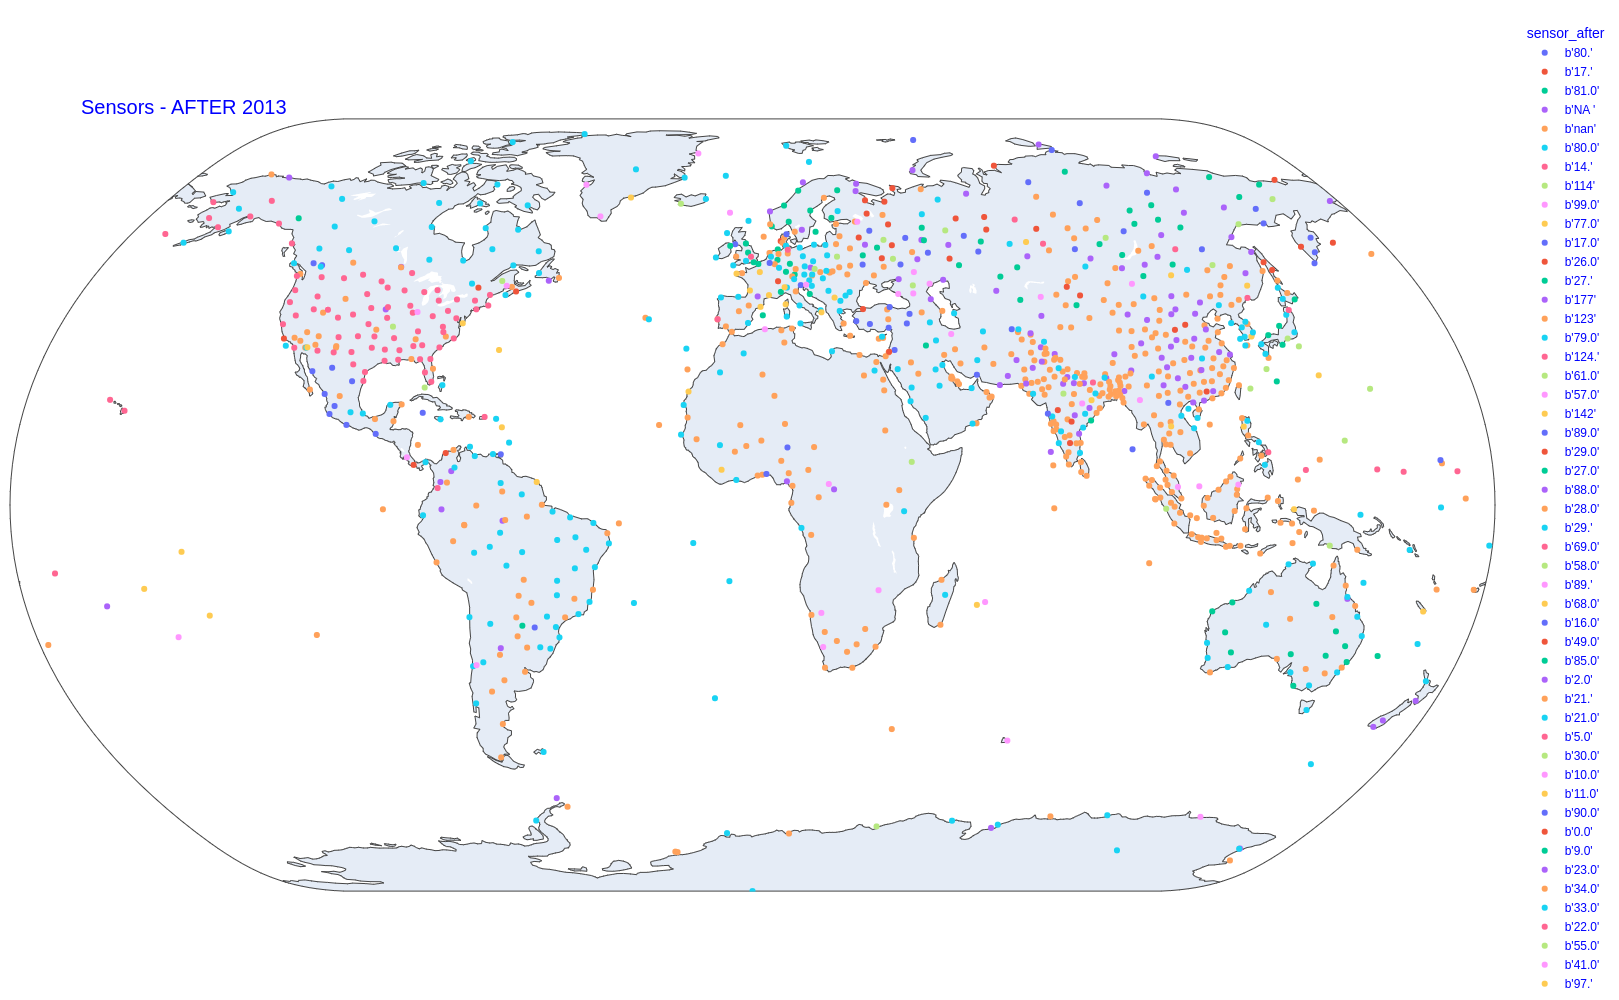

In [159]:
import plotly.express as px


fig = px.scatter_geo(data_after, 
                     lat = "lat",
                     lon = "lon",
                     color="sensor_after", # which column to use to set the color of markers
                     hover_name="primary_id", # column added to hover information
                     projection="natural earth")

fig.update_layout(
    margin=dict(l=10, r=10, t=20, b=10),
    #paper_bgcolor="pink",
)

# fig size
fig.update_layout(width= 1500, height = 1000)

# title
fig.update_layout(title_text='Sensors - AFTER 2013 ',
                  title_y=0.9,
                  title_font_size=20,
)
fig.update_layout(
    font_color="blue",
)

fig.show()

In [37]:
analyze_df(files[0])

/scratch/das/federico/MERGED_25FEB2022/0-124-0-73033_CEUAS_merged_v1.nc


{'s_bef': "b'31.'",
 'd_bef': numpy.datetime64('1994-01-14T00:00:00.000000000'),
 's_aft': "b'80.'",
 'd_aft': numpy.datetime64('2018-01-29T23:15:10.000000000'),
 'station_name': 'Vernon UA, BC',
 'lat': 50.261944,
 'lon': -119.27167,
 'primary_is': '0-124-0-73033'}